# 2021년 2학기 금융시장의 빅데이터 분석 기말고사(담당교수: 박석진)

# Regression vs Classification (총 40점)

- 이번 문제들에서는 Lasso example 노트북의 실현변동성(realized volatility) 데이터를 이용합니다.

- (1) (3점) 'data1.csv' 파일을 불러오고 맨 위, 맨 아래 행을 각각 5개씩 출력하세요.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('data1.csv', index_col=0, parse_dates = True)
df.head()

,Symbol,rk_twoscale,rk_th2,close_price,rv5,rv5_ss,open_price,rv10,rk_parzen,rsv,medrv,bv_ss,rsv_ss,open_time,rv10_ss,nobs,bv,open_to_close,close_time
2000-01-03 00:00:00+00:00,.AEX,0.000103,0.000102,675.44,0.000130,0.000130,675.67,0.000178,0.000179,0.000046,0.000050,0.000100,0.000046,90101.0,0.000178,1795.0,0.000100,-0.000340,163015.0
2000-01-04 00:00:00+00:00,.AEX,0.000199,0.000201,642.25,0.000201,0.000201,664.20,0.000261,0.000423,0.000147,0.000075,0.000207,0.000147,90416.0,0.000261,1785.0,0.000207,-0.033606,163016.0
2000-01-05 00:00:00+00:00,.AEX,0.000325,0.000345,632.31,0.000491,0.000491,633.37,0.000714,0.000324,0.000328,0.000166,0.000361,0.000328,90016.0,0.000714,1801.0,0.000361,-0.001675,163016.0
2000-01-06 00:00:00+00:00,.AEX,0.000218,0.000221,624.21,0.000225,0.000225,632.46,0.000182,0.000219,0.000116,0.000152,0.000258,0.000116,90016.0,0.000182,1799.0,0.000258,-0.013130,163002.0
2000-01-07 00:00:00+00:00,.AEX,0.000126,0.000123,644.86,0.000138,0.000138,628.93,0.000157,0.000155,0.000048,0.000039,0.000130,0.000048,90046.0,0.000157,1798.0,0.000130,0.025013,163016.0


In [3]:
df.tail()

,Symbol,rk_twoscale,rk_th2,close_price,rv5,rv5_ss,open_price,rv10,rk_parzen,rsv,medrv,bv_ss,rsv_ss,open_time,rv10_ss,nobs,bv,open_to_close,close_time
2021-11-15 00:00:00+00:00,.STOXX50E,0.000012,0.000012,4381.38,0.000015,0.000015,4364.52,0.000012,0.000008,0.000005,0.000004,0.000013,0.000005,90015.0,0.000012,4116.0,0.000013,0.003856,173004.0
2021-11-16 00:00:00+00:00,.STOXX50E,0.000015,0.000015,4402.04,0.000011,0.000011,4393.80,0.000010,0.000006,0.000004,0.000005,0.000012,0.000004,90015.0,0.000010,4210.0,0.000012,0.001874,173002.0
2021-11-17 00:00:00+00:00,.STOXX50E,0.000009,0.000009,4402.69,0.000009,0.000009,4399.25,0.000007,0.000005,0.000005,0.000005,0.000008,0.000005,90015.0,0.000007,4247.0,0.000008,0.000782,173015.0
2021-11-18 00:00:00+00:00,.STOXX50E,0.000014,0.000014,4383.91,0.000011,0.000011,4400.73,0.000011,0.000017,0.000007,0.000004,0.000010,0.000007,90015.0,0.000011,4153.0,0.000010,-0.003829,173002.0
2021-11-19 00:00:00+00:00,.STOXX50E,0.000103,0.000105,4361.27,0.000094,0.000094,4385.66,0.000125,0.000117,0.000050,0.000047,0.000086,0.000050,90015.0,0.000125,4190.0,0.000086,-0.005577,173003.0


- (2) (3점) 데이터 중 코스피 지수(symbol=KS11)에 해당하는 데이터 중 'rv5' 만을 따로 뽑아내서 새로운 dataframe을 구성하고, rv5의 과거값을 lag1 부터 lag 50까지(i.e., $RV5_{t-1} \sim RV5_{t-50}$)를 각각 개별적인 column으로 추가하세요.

In [4]:
df1 = df.loc[df['Symbol']=='.KS11']
df2=df1[['rv5']]
df2 

,rv5
2000-01-04 00:00:00+00:00,0.001130
2000-01-05 00:00:00+00:00,0.000753
2000-01-06 00:00:00+00:00,0.000907
2000-01-07 00:00:00+00:00,0.001066
2000-01-10 00:00:00+00:00,0.000303
...,...
2021-11-15 00:00:00+00:00,0.000035
2021-11-16 00:00:00+00:00,0.000029
2021-11-17 00:00:00+00:00,0.000032
2021-11-18 00:00:00+00:00,0.000076


In [5]:
lst = ['rv5_'+str(i+1) for i in range(50)]
for i in range(50):
    df2[lst[i]]=df2.rv5.shift(i+1)
df2

,rv5,rv5_1,rv5_2,rv5_3,rv5_4,rv5_5,rv5_6,rv5_7,rv5_8,rv5_9,...,rv5_41,rv5_42,rv5_43,rv5_44,rv5_45,rv5_46,rv5_47,rv5_48,rv5_49,rv5_50
2000-01-04 00:00:00+00:00,0.001130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00+00:00,0.000753,0.001130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00+00:00,0.000907,0.000753,0.001130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00+00:00,0.001066,0.000907,0.000753,0.001130,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10 00:00:00+00:00,0.000303,0.001066,0.000907,0.000753,0.001130,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15 00:00:00+00:00,0.000035,0.000032,0.000031,0.000048,0.000108,0.000088,0.000077,0.000032,0.000068,0.000048,...,0.000051,0.000048,0.000036,0.000026,0.000050,0.000037,0.000036,0.000073,0.000061,0.000033
2021-11-16 00:00:00+00:00,0.000029,0.000035,0.000032,0.000031,0.000048,0.000108,0.000088,0.000077,0.000032,0.000068,...,0.000046,0.000051,0.000048,0.000036,0.000026,0.000050,0.000037,0.000036,0.000073,0.000061
2021-11-17 00:00:00+00:00,0.000032,0.000029,0.000035,0.000032,0.000031,0.000048,0.000108,0.000088,0.000077,0.000032,...,0.000024,0.000046,0.000051,0.000048,0.000036,0.000026,0.000050,0.000037,0.000036,0.000073
2021-11-18 00:00:00+00:00,0.000076,0.000032,0.000029,0.000035,0.000032,0.000031,0.000048,0.000108,0.000088,0.000077,...,0.000048,0.000024,0.000046,0.000051,0.000048,0.000036,0.000026,0.000050,0.000037,0.000036


- (3) (4점) 데이터에 대해 ADF test를 시행해 시계열 자료가 안정적인지 검증하세요.

(-30.612012056972745,
 0.0,
 67,
 155430,
 {'1%': -3.430392073010361,
  '5%': -2.8615585956845027,
  '10%': -2.56677989781942},
 -2181887.4598227832)

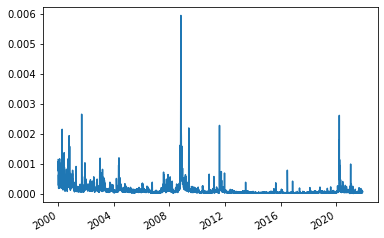

In [68]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

df2.rv5.plot()
adfuller(df.rv5, regression='c')

p-value가 0이 나왔기 때문에 불안정하다는 귀무가설을 기각하여 안정 시계열 데이터임을 확인할 수 있다.

- (4)  (3점) Dataframe의 rv5를 y변수로, rv5를 제외한 모든 lag 변수들을 X 변수로 설정하고, sklearn의 train_test_split을 이용해 train set과 test set을 구성하세요(이때, train_test_split에서 test size는 0.3, random state는 42로 설정).

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

y = df2['rv5'][50:]
X = df2.drop('rv5',axis=1).dropna()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

- (5) (5점) sklearn의 LinearRegression을 train set으로 훈련하고, test set에 대해 예측을 진행하십시오. Test set에 대한 LinearRegression 모형의 $R^2$ score를 도출하십시오. $R^2$ score의 정의를 기준으로 위의 모형이 rv5에 대해 예측력을 가진다고 말할 수 있습니까?

In [22]:
reg = LinearRegression()
reg.fit(X_train, y_train) #훈련하기

LinearRegression()

In [23]:
predicted = reg.predict(X_val)
print(r2_score(y_val,predicted))

0.5208064744359


R square는 회귀 방정식이 얼마나 실제값을 잘 설명하고 있는지를 나타내는 값인데 통상적으로 R square가 26이상이면 예측력을 가진다고 하는데 test set에 대한 예측에서도 50이상의 결과가 나왔으니 예측력을 가진다고 할 수 있다

- (6) (6점) rv5가 직전 관측치보다 상승했으면 1, 감소하거나 변하지 않았으면 0을 부여하고 이를 y변수로 설정합니다. sklearn의 Logistic regression을 train set으로 훈련하고, test set에 대한 Logistic regression 모형의 classification report를 도출하십시오(단, hyperparameter는 따로 tuning하지 않고 default 값 그대로 사용합니다). 이 결과를 바탕으로, logistic regression 모형이 rv5의 움직임에 대해 예측력을 가진다고 말할 수 있습니까?

In [10]:
df_=df2

In [11]:
df_['ret']=df_.rv5.diff() #이전 관측치보다 하락했으면 음수(0)
df_['y']=0
df_.loc[df_.ret>0, 'y']=1
#df2['y']=df2.y.shift(-1)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

y=df_.y[50:]
X = df_.drop(['rv5','ret','y'],axis=1)[50:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       818
           1       0.49      1.00      0.66       783

    accuracy                           0.49      1601
   macro avg       0.24      0.50      0.33      1601
weighted avg       0.24      0.49      0.32      1601



In [65]:
len(y[y==1])/len(y)

0.504124484439445

classification_report를 보면, accuracy는 50에 가까우나 positive=0이라고 예측했을 때 성능평가 지표들이 모두 0인 것을 확인할 수 있습니다. 또한 1이라고 예측했을 때의 recall값을 보면 1인데, 이것을 보면 예측값을 모두 1이라고 예측했다는 것을 확인할 수 있습니다. 따라서 rv5에 대한 예측력을 가지고 있는 모형이 아닙니다.

- (7) (6점) 다음 날의 rv5가 오늘의 rv5와 같을 것이라는 모형(즉, $\hat{rv}_{t+1} = rv_t$)의 $R^2$ score를 (5)의 test set을 이용해 도출하고, 이 결과를 바탕으로 (5)와 (6)의 결과를 해석하세요.

In [7]:
y = df2['rv5'][50:].shift(1).dropna()
X = df2.drop('rv5',axis=1).dropna()[1:]

In [8]:
reg = LinearRegression()
reg.fit(X, y)
reg.score(X_val, y_val) #(5)의 test set을 통해 도출

0.38250884792078177

이 모형에서의 예측력은 약 38%정도라고 할 수 있는데 앞서 사용한 linear regression과 logistic regression에서의 예측 정확도보다는 낮은 수준입니다. 단순히 전날의 rv5값을 통해 예측을 하기보다 조금 더 긴 기간의 데이터를 두고 예측을 하는 것이 정확도가 높다는 것을 알 수 있습니다. 과거의 값들이 long term으로 미래의 값들에 영향을 미치고 있다는 것을 의미한다고도 할 수 있습니다.

- (8) (6점) (6)의 분석을 SVM과 Random Forest로 다시 진행하고(단, hyperparameter는 따로 tuning하지 않고 default 값 그대로 사용합니다), test set에 대한 각 모형의 classification report를 도출합니다.

In [15]:
y=df_.y[50:]
X = df_.drop(['rv5','ret','y'],axis=1)[50:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
#support vector machine
model = SVC()

model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.63      0.27      0.37       818
           1       0.52      0.84      0.64       783

    accuracy                           0.55      1601
   macro avg       0.58      0.55      0.51      1601
weighted avg       0.58      0.55      0.51      1601



In [17]:
#Random Forest
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       818
           1       0.62      0.61      0.61       783

    accuracy                           0.63      1601
   macro avg       0.63      0.62      0.62      1601
weighted avg       0.63      0.63      0.63      1601



- (9) (4점)  어느 모형의 예측 성능이 가장 좋게 나왔습니까? (open question) 각 모형의 특징을 바탕으로 위 결과를 설명할 수 있겠습니까?

Random Forest는 accuracy가 63%이고 다른 성능 지표들도 60% 넘는 결과가 나왔기 때문에 모형들 중에 가장 좋은 성능을 갖고 있다고 할 수 있다. logistic regression은 아까 언급한 바와 같이 예측력을 가지지 않고 있고, linear regression과 support vector machine은 예측력이 50% 조금 넘게 나왔다. linear regression의 경우 선형성을 가정한 것이 예측력이 떨어진 이유가 될 수 있겠고, Random Forest의 경우 의사결정 나무들을 random한 데이터로 구조를 달리하여 훈련시키기 때문에 다른 모형들에 비해서 좋은 성능을 가지게 된 것으로 설명할 수 있다. support vector machine의 경우도 다른 모형들에 비해서는 예측력이 좋은 편이나 random forest보다는 randomness를 관리하지 못해서인지 정확도가 떨어지고 있다.